In [18]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import glob
import math

In [19]:
data_directory = '/projects/b1118/miniscope/analysis/spatial_data/spatial_clustering/jones_script_analysis/'
data_directory_ko = '/projects/b1118/miniscope/analysis/spatial_data/spatial_clustering/jones_script_analysis/'

In [20]:

WT_sessions = ['DO_1_Day1_motion_corrected_h5', 'DO_1_Day2_motion_corrected_h5', 'DO_1_Day3_motion_corrected_h5',
               'DO_2_Day2_16_11_47', 'DO_2_Day1_16_46_28', 'DO_2_Day1_16_46_28_08_35', 'DO_3_Day_1_motion_corrected_h5', 
               'DO_3_Day2_15_41_21', 'DO_3_Day3_15_41_20', 'DO_3_Day3_15_49_55', 'DO_3_Day_3_16_06_35'] ; 

KO_sessions = ['DO_4_Day1_17_04_56', 'DO_4_Day_2_16_19_46', 'DO_4_Day_3_18_17_02', 'DO_5_Day_1_17_55_43', 'DO_5_Day_2_16_47_35', 
               'DO_5_Day_2_17_02_17', 'DO_5_Day_2_17_22_37', 'DO_6_Day_1_17_03_46',
               'DO_6_Day_2_15_57_05', 'DO_6_Day_3_14_59_55'] ;

## compile and plot genotype data

In [21]:
#compile in dictionaries
#might need to shift matlab pair inidcies due to 1-indexing
jaccard_analysis_by_session = {}
for session in WT_sessions:
    print(session)
    session_output = {}
    for file in glob.glob(data_directory+'/'+session+'*normlBinnedCellJaccards.csv'):
        session_output[file.split('_')[-1][:-4]] = pd.read_csv(file, header=None)
    jaccard_analysis_by_session[session] = session_output
    
#compile in dictionaries
#might need to shift matlab pair inidcies due to 1-indexing
jaccard_analysis_by_session_ko = {}
for session in KO_sessions:
    print(session)
    session_output = {}
    for file in glob.glob(data_directory_ko+'/'+session+'*normlBinnedCellJaccards.csv'):
        session_output[file.split('_')[-1][:-4]] = pd.read_csv(file, header=None)
    jaccard_analysis_by_session_ko[session] = session_output

DO_1_Day1_motion_corrected_h5
DO_1_Day2_motion_corrected_h5
DO_1_Day3_motion_corrected_h5
DO_2_Day2_16_11_47
DO_2_Day1_16_46_28
DO_2_Day1_16_46_28_08_35
DO_3_Day_1_motion_corrected_h5
DO_3_Day2_15_41_21
DO_3_Day3_15_41_20
DO_3_Day3_15_49_55
DO_3_Day_3_16_06_35
DO_4_Day1_17_04_56
DO_4_Day_2_16_19_46
DO_4_Day_3_18_17_02
DO_5_Day_1_17_55_43
DO_5_Day_2_16_47_35
DO_5_Day_2_17_02_17
DO_5_Day_2_17_22_37
DO_6_Day_1_17_03_46
DO_6_Day_2_15_57_05
DO_6_Day_3_14_59_55


In [22]:
#jaccard_analysis_by_session_ko

In [23]:
#plot across sessions
genotype_compiled = pd.concat([jaccard_analysis_by_session[session]['normlBinnedCellJaccards'] for session in WT_sessions], keys=WT_sessions)
genotype_compiled_ko = pd.concat([jaccard_analysis_by_session_ko[session]['normlBinnedCellJaccards'] for session in KO_sessions], keys=KO_sessions)

In [24]:
#genotype_compiled_ko

In [25]:
#average multiple sessions per day

#wt 
wt_by_day = {}
wt_by_day['DO_1_Day1'] = genotype_compiled.loc['DO_1_Day1_motion_corrected_h5']
wt_by_day['DO_1_Day2'] = genotype_compiled.loc['DO_1_Day2_motion_corrected_h5']
wt_by_day['DO_1_Day3'] = genotype_compiled.loc['DO_1_Day3_motion_corrected_h5']
wt_by_day['DO_2_Day1'] = pd.DataFrame(genotype_compiled.loc[['DO_2_Day1_16_46_28','DO_2_Day1_16_46_28_08_35']].mean(axis=0)).transpose()
wt_by_day['DO_2_Day2'] = genotype_compiled.loc['DO_2_Day2_16_11_47']
wt_by_day['DO_3_Day1'] = genotype_compiled.loc['DO_3_Day_1_motion_corrected_h5']
wt_by_day['DO_3_Day2'] = genotype_compiled.loc['DO_3_Day2_15_41_21']
wt_by_day['DO_3_Day3'] = pd.DataFrame(genotype_compiled.loc[['DO_3_Day3_15_41_20', 'DO_3_Day3_15_49_55', 'DO_3_Day_3_16_06_35']].mean(axis=0)).transpose()

wt_by_day = pd.concat(wt_by_day.values(), keys=wt_by_day.keys())

#ko 
ko_by_day = {}
ko_by_day['DO_4_Day1'] = genotype_compiled_ko.loc['DO_4_Day1_17_04_56']
ko_by_day['DO_4_Day2'] = genotype_compiled_ko.loc['DO_4_Day_2_16_19_46']
ko_by_day['DO_4_Day3'] = genotype_compiled_ko.loc['DO_4_Day_3_18_17_02']
ko_by_day['DO_5_Day1'] = genotype_compiled_ko.loc['DO_5_Day_1_17_55_43']
ko_by_day['DO_5_Day2'] = pd.DataFrame(genotype_compiled_ko.loc[['DO_5_Day_2_16_47_35', 'DO_5_Day_2_17_02_17', 'DO_5_Day_2_17_22_37']].mean(axis=0)).transpose() 
ko_by_day['DO_6_Day1'] = genotype_compiled_ko.loc['DO_6_Day_1_17_03_46']
ko_by_day['DO_6_Day2'] = genotype_compiled_ko.loc['DO_6_Day_2_15_57_05']
ko_by_day['DO_6_Day3'] = genotype_compiled_ko.loc['DO_6_Day_3_14_59_55']

ko_by_day = pd.concat(ko_by_day.values(), keys=ko_by_day.keys())

In [26]:
wt_by_day

,,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DO_1_Day1,0,7.202700,4.281600,2.841400,2.5669,2.416600,2.065800,2.032100,1.849700,1.835900,1.738400,...,1.250500,1.240300,1.2273,1.397700,1.58320,0.581850,0.47442,0.4184,NaN,NaN
DO_1_Day2,0,13.134000,7.862400,4.793200,3.8252,4.122600,3.829300,3.531900,4.693100,4.010700,4.208700,...,2.303000,2.959800,1.6835,2.280300,NaN,NaN,NaN,NaN,NaN,NaN
DO_1_Day3,0,15.766000,9.246200,6.892200,4.9936,3.874500,3.734000,3.299900,3.138200,3.020400,3.078400,...,1.755000,1.895400,2.0738,2.097800,2.59290,3.079700,3.37840,4.8326,5.4696,7.0279
DO_2_Day1,0,7.016100,5.319450,3.870750,3.4167,3.210650,3.157200,3.115350,3.039450,2.908750,2.911750,...,2.463300,2.410200,2.2238,1.936250,1.91205,1.646150,1.75785,1.3395,3.0391,NaN
DO_2_Day2,0,6.475500,4.950100,3.911600,3.4577,3.106600,3.180500,3.027100,3.009100,2.959900,3.007600,...,2.800500,2.719000,2.5330,2.616900,2.32520,1.845800,1.64460,1.5706,1.4606,1.7322
DO_3_Day1,0,33.354000,21.256000,12.956000,12.2570,11.128000,12.443000,11.150000,11.954000,9.092700,10.128000,...,8.879600,7.798300,12.0350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DO_3_Day2,0,26.187000,17.071000,8.995500,7.3870,7.525700,6.622600,6.489700,6.081500,6.344700,5.537600,...,5.236300,3.234400,3.6403,5.176400,1.41350,NaN,2.53090,NaN,NaN,NaN
DO_3_Day3,0,12.702333,8.025667,5.542567,4.4257,3.836367,3.730067,3.549867,3.391933,3.372167,3.344533,...,2.719133,2.576567,2.4926,2.000033,2.13230,1.716673,0.63055,NaN,0.0000,NaN


In [27]:
ko_by_day

,,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DO_4_Day1,0,8.971000,6.8123,4.201900,3.786400,3.686000,3.9314,3.565600,3.363600,3.199400,2.599500,...,2.618900,2.10910,2.249200,2.673000,2.11510,2.044300,1.511400,NaN,NaN,NaN
DO_4_Day2,0,17.392000,11.9690,10.315000,8.268400,6.990000,6.4888,4.861900,4.579500,4.120900,3.802700,...,3.902200,4.09440,3.530400,3.879700,3.95210,3.639400,3.173600,2.988000,1.7965,3.3276
DO_4_Day3,0,9.593300,7.1239,4.854100,4.410100,4.885200,3.8768,2.572700,3.094000,3.309300,3.029600,...,1.450200,2.24820,1.467700,2.956100,1.93040,1.964300,NaN,2.554400,NaN,NaN
DO_5_Day1,0,45.572000,28.0930,19.632000,13.422000,9.924900,8.5886,8.235000,7.714600,8.358600,8.240500,...,5.189500,7.24360,4.710100,3.938600,4.54130,4.378800,3.380400,5.384500,NaN,NaN
DO_5_Day2,0,23.811333,13.5079,10.350367,9.163467,9.554667,8.5146,8.705133,7.974767,8.824867,8.118067,...,8.043167,8.28370,6.745033,8.501733,7.96070,5.202033,7.280967,3.042733,7.4370,NaN
DO_6_Day1,0,9.618100,6.3215,5.153700,4.432700,3.780800,3.5017,3.231300,2.974500,2.791000,2.766700,...,2.217500,2.61090,2.612000,2.114000,2.21480,2.955500,2.125000,NaN,NaN,NaN
DO_6_Day2,0,5.525900,3.7347,2.855500,2.255700,1.788500,1.6922,1.556200,1.309800,1.208000,1.145500,...,0.917940,0.77845,0.701920,0.234810,1.43420,NaN,NaN,NaN,NaN,NaN
DO_6_Day3,0,15.075000,8.8369,5.032600,3.862200,2.245500,1.4986,1.714300,1.323700,1.341900,1.375400,...,0.650810,1.03420,1.646600,1.555600,0.94666,1.226000,NaN,NaN,NaN,NaN


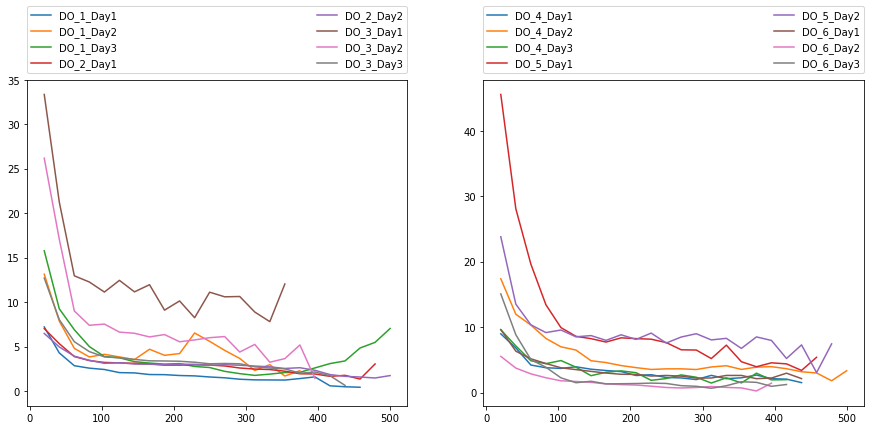

In [28]:
fig = plt.figure()
plt.subplot(1, 2, 1)

for session in range(len(wt_by_day)):
    bin_vector = np.linspace(20, 500, len(wt_by_day.iloc[session,:].values))
    plt.plot(bin_vector, wt_by_day.iloc[session,:].values, label=list(wt_by_day.index)[session][0])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

fig.set_size_inches(15, 6)

plt.subplot(1, 2, 2)

for session in range(len(ko_by_day)):
    bin_vector = np.linspace(20, 500, len(ko_by_day.iloc[session,:].values))
    plt.plot(bin_vector, ko_by_day.iloc[session,:].values, label=list(ko_by_day.index)[session][0])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

fig.set_size_inches(15, 6)
#fig.savefig('/projects/b1118/miniscope/analysis/summaryfigures/coactivity_data_bysession_sidebyside_indiv_creoff.pdf', transparent=True)
plt.show()

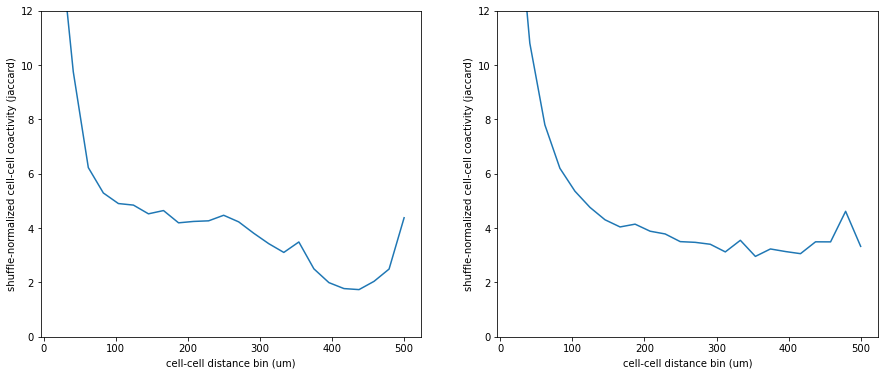

In [29]:
#plot average for genotype
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.plot(bin_vector, wt_by_day.mean())
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((0,12))
#plot average for genotype
plt.subplot(1, 2, 2)
plt.plot(bin_vector, ko_by_day.mean())
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((0,12))


fig.set_size_inches(15, 6)
fig.savefig('/projects/b1118/miniscope/analysis/summaryfigures/coactivity_data_sidebyside_group_creoff.pdf', transparent=True)
plt.show()

## compile ko data

## overlay ko and wt 

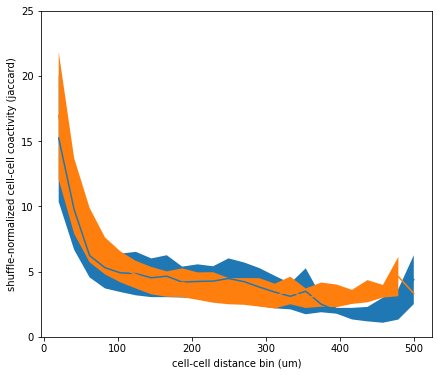

In [30]:
mean = wt_by_day.mean()
mean_ko = ko_by_day.mean()
std_error = wt_by_day.std()/math.sqrt(4)
std_error_ko = ko_by_day.std()/math.sqrt(7)
plt.plot(bin_vector, mean)
plt.plot(bin_vector, mean_ko)
plt.fill_between(bin_vector, mean-std_error, mean+std_error)
plt.fill_between(bin_vector, mean_ko-std_error_ko, mean_ko+std_error_ko)
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((0,25))
fig = plt.gcf()
fig.set_size_inches(7, 6)
fig.savefig('/projects/b1118/miniscope/analysis/summaryfigures/combined_coactivity_creoff.pdf', transparent=True)
plt.show()